# Tomato Leaf Disease Dataset – Exploration

Goal:
- Understand dataset structure
- Count images per class
- Visually inspect disease patterns

Dataset:
- PlantVillage (Tomato, 10 classes)
- Single leaf, clean background


In [1]:
print("Kernal check...")

Kernal check...


In [2]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
DATA_DIR=Path("../data/raw/plantvillage/tomato")

print(f"Does data path exist? :- {DATA_DIR.exists()}")
DATA_DIR

Does data path exist? :- True


WindowsPath('../data/raw/plantvillage/tomato')

In [ ]:
classes=sorted([d.name for d in DATA_DIR.iterdir() if d.is_dir()])
print(classes)

['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites', 'Tomato_Target_Spot', 'Tomato_Tomato_YellowLeaf_Curl_Virus', 'Tomato_Tomato_mosaic_virus', 'Tomato_healthy'] 



In [20]:
class_counts={}

for cls in classes:
    class_path=DATA_DIR/cls
    images=list(class_path.glob("*"))
    images=[img for img in images if img.suffix.lower() in [".jpg",".png"]]
    class_counts[cls] = len(images)


class_counts=dict(sorted(class_counts.items(),key=lambda x:x[1]))
for key,value in class_counts.items():
    print(f"{key} ->>> {value}")

Tomato_Tomato_mosaic_virus ->>> 373
Tomato_Leaf_Mold ->>> 952
Tomato_Early_blight ->>> 1000
Tomato_Target_Spot ->>> 1404
Tomato_healthy ->>> 1591
Tomato_Spider_mites ->>> 1676
Tomato_Septoria_leaf_spot ->>> 1771
Tomato_Late_blight ->>> 1908
Tomato_Bacterial_spot ->>> 2127
Tomato_Tomato_YellowLeaf_Curl_Virus ->>> 3208


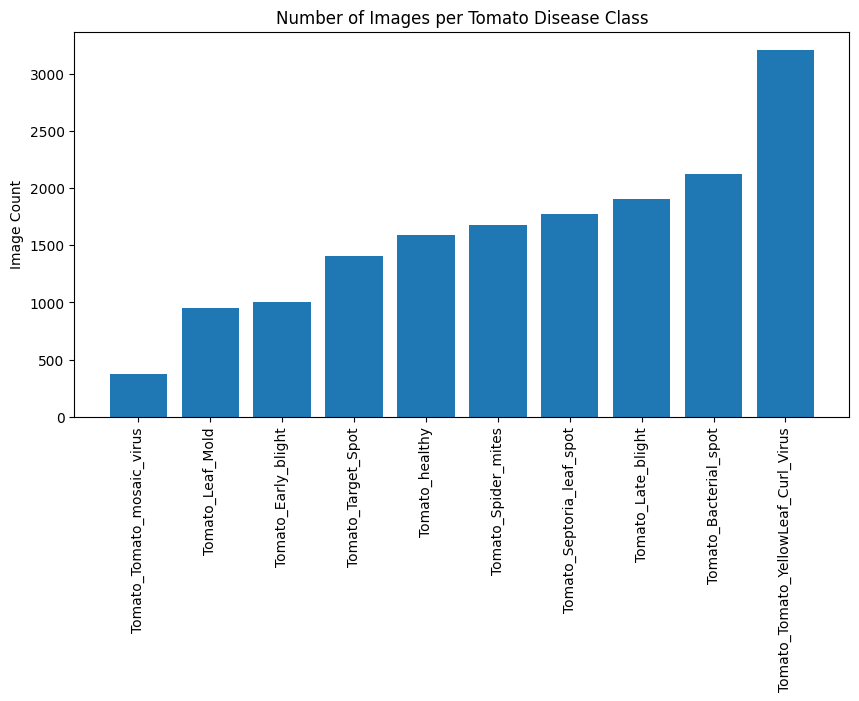

In [23]:
plt.figure(figsize=(10,5))
plt.bar(class_counts.keys(),class_counts.values())
plt.xticks(rotation=90)
plt.title("Number of Images per Tomato Disease Class")
plt.ylabel("Image Count")
plt.show()


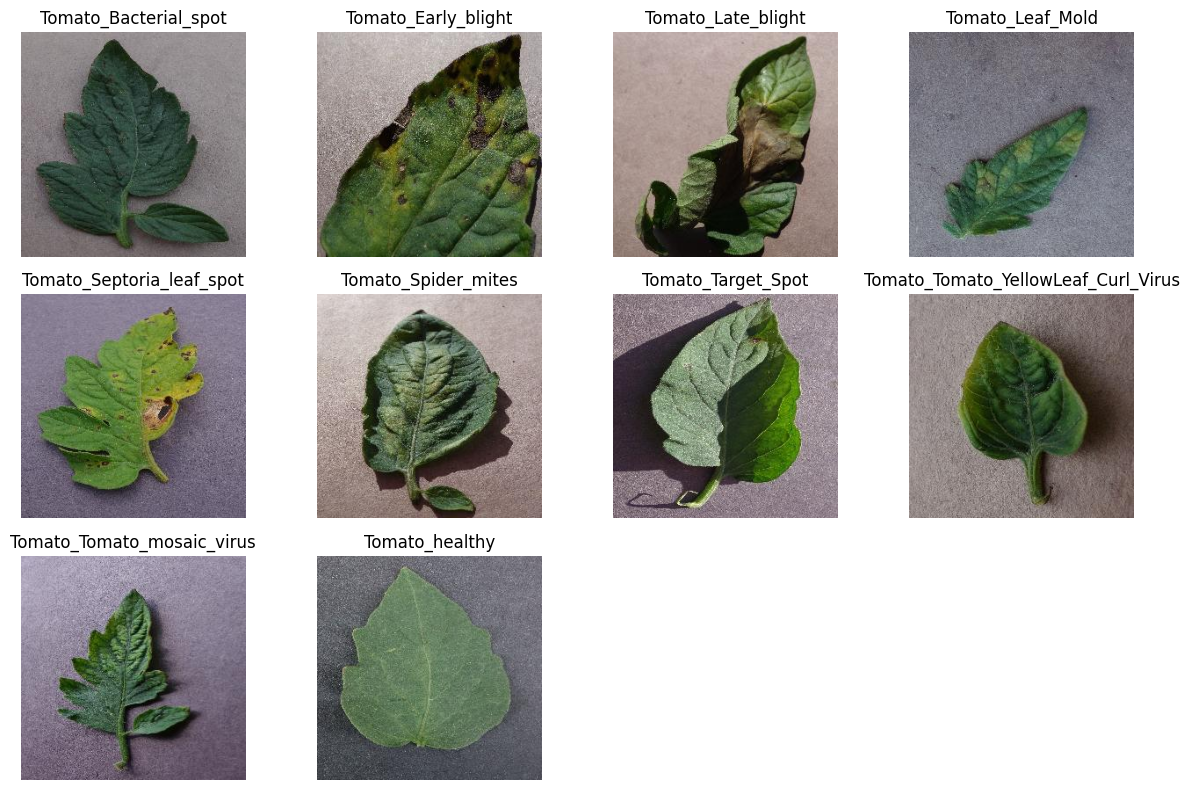

In [24]:
plt.figure(figsize=(12,8))

for i,cls in enumerate(classes):
    img_path=next((DATA_DIR/cls).glob("*"))
    img=Image.open(img_path)


    plt.subplot(3,4,i+1)
    plt.imshow(img)
    plt.title(cls.replace("Tomato___", ""))
    plt.axis("off")

plt.tight_layout()
plt.show()